# Exercise M6.03

This exercise aims at verifying if AdaBoost can over-fit. We will make a grid-search and check the scores by varying the number of estimators.

We will first load the California housing dataset and split it into training and a testing set.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100 # rescale the target in k$
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0,
                                                                   test_size=.5)

Then, create and AdaBoostRegressor instance. We use the function `sklearn.model_selection.validation_curve` to get training and test scores by varying the number of estimators. The mean absolute error as a metric is obtained by passing `scoring="neg_mean_absolute_error"`. 

In [6]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import validation_curve

In [15]:
adaboost = AdaBoostRegressor(random_state=0)
param_range = np.unique(np.logspace(0, 1.78, num=30).astype(int))
train_scores, test_scores = validation_curve(adaboost,
                                            data_train, target_train,
                                            param_name="n_estimators",
                                            param_range=param_range,
                                            scoring="neg_mean_absolute_error",
                                            n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

Plot both the mean training and test errors. You can also plot the standard deviation of the errors

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Validation curve for AdaBoost regressor')

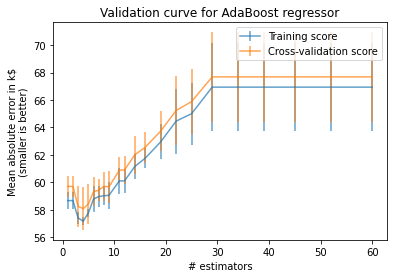

In [17]:
plt.errorbar(param_range, train_errors.mean(axis=1),
            yerr=train_errors.std(axis=1), label="Training score",
            alpha=.7)
plt.errorbar(param_range, test_errors.mean(axis=1),
            yerr=test_errors.std(axis=1), label="Cross-validation score",
            alpha=.7)
plt.legend()
plt.ylabel('Mean absolute error in k$\n(smaller is better)')
plt.xlabel('# estimators')
plt.title('Validation curve for AdaBoost regressor')

In [14]:
np.unique(np.logspace(0, 1.78, num=28).astype(int))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 15, 17, 20, 24, 28, 32,
       38, 44, 51, 60])